<a href="https://colab.research.google.com/github/naveenkvarma/AI_ML_Internship/blob/main/Week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Summary of Week 1 and 2 Tasks**

### **Week 1:**
- **Data Exploration:** Gained understanding of the dataset, key features, and their relationships.
- **Data Preparation:** Performed data cleaning, feature encoding, and scaling.
- **Initial Visualization:** Created basic plots to explore data distribution and relationships.

### **Week 2:**
- **Model Training:** Tested multiple models (Logistic Regression, Random Forest, etc.) for predicting product success.
- **Predictive Analysis:** Predicted success with Indian raw materials and analyzed model performance.
- **Advanced Visualization:** Developed a correlation heatmap and confusion matrices to evaluate feature relationships and model accuracy.
- **Efficiency Prediction:** Used models to predict global product efficiency based on stock values.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('/content/smp dataset.csv')
df.head(10)

,Price,Value for money,Total Profits,Total number of people in use of their services,Total Sales since launch,Bestseller in which Country based on the sales of their stock,Best in Tech for both based on the sales of the stock,Stock Value,Total Number of average stocks Bought In total as of today
0,150.25,medium,2.500000e+08,12000000,6000000,USA,Apple,160.5,5000000
1,120.00,high,3.000000e+07,8000000,4000000,China,Samsung,135.0,6000000
2,125.50,medium,1.500000e+10,200000000,3000000000,India,Apple,130.0,50000000
3,78.90,high,1.000000e+09,15000000,25000000,Brazil,Samsung,80.0,40000000
4,95.20,low,1.200000e+09,18000000,3000000,China,Apple,100.0,60000000
5,87.60,medium,1.400000e+09,22000000,4000000,USA,Samsung,90.0,70000000
6,112.30,high,1.800000e+09,25000000,5000000,Germany,Apple,120.0,80000000
7,65.40,low,8.000000e+07,12000000,2000000,Japan,Samsung,70.0,30000000
8,101.70,medium,1.600000e+09,23000000,4500000,Canada,Apple,110.0,90000000
9,72.80,high,9.000000e+07,14000000,2500000,Australia,Samsung,75.0,25000000


In [ ]:
X = df.drop('Best in Tech for both based on the sales of the stock', axis=1)
y = df['Best in Tech for both based on the sales of the stock']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

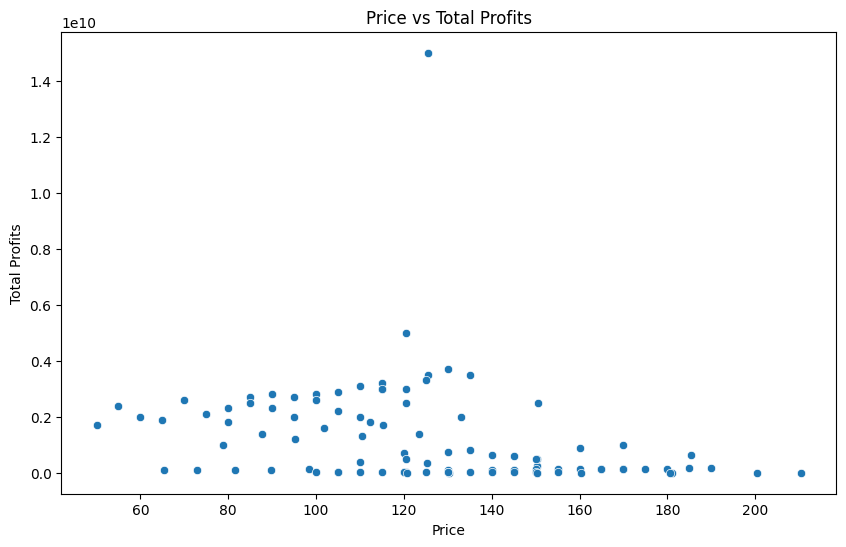

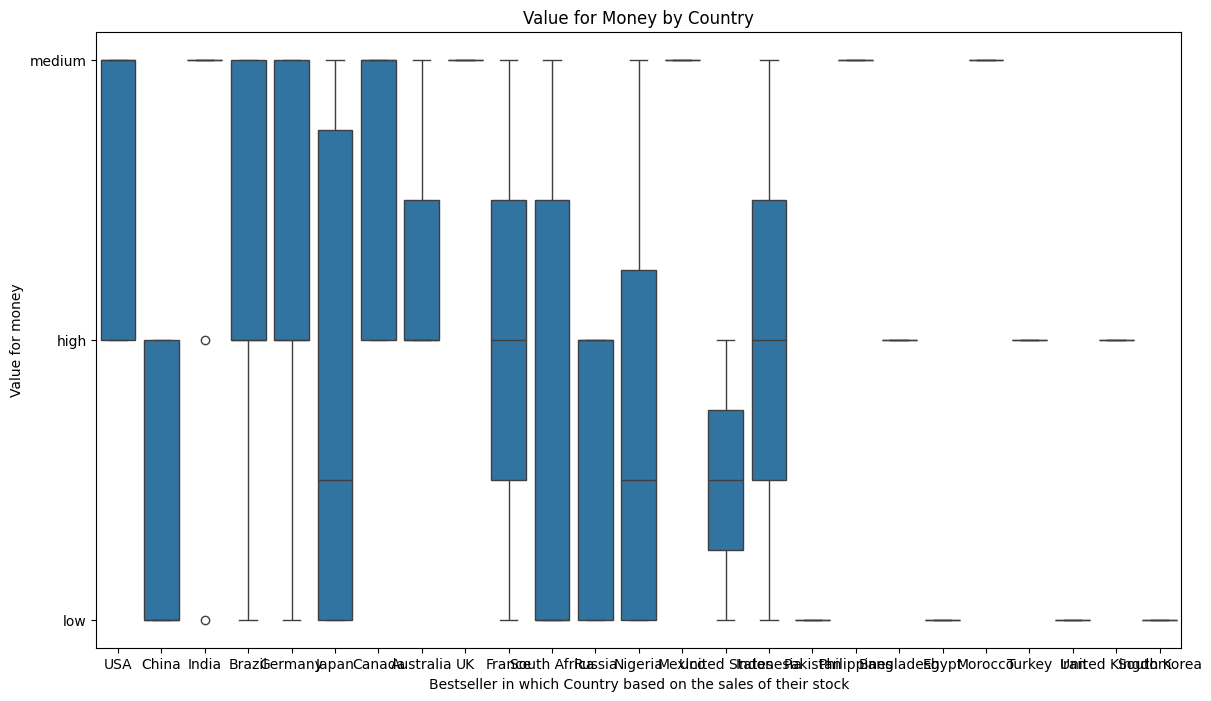

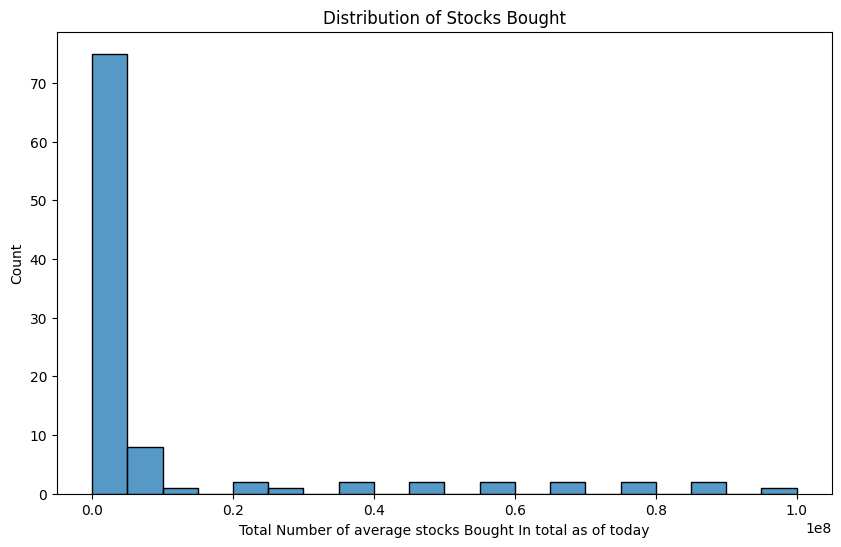

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# to visualize the relationship between Price and Total Profits
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Total Profits', data=df)
plt.title('Price vs Total Profits')
plt.show()

# to visualize the distribution of Value for Money across countries
plt.figure(figsize=(14, 8))
sns.boxplot(x='Bestseller in which Country based on the sales of their stock', y='Value for money', data=df)
plt.title('Value for Money by Country')
plt.show()

# The distribution of total no of stocks bought
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Number of average stocks Bought In total as of today'], bins=20)
plt.title('Distribution of Stocks Bought')
plt.show()

In [ ]:
# my dataset has the string values to identify
non_numeric_cols = df.select_dtypes(exclude=['number']).columns

In [ ]:
# to convert that non-numeric columns to numeric if applicable
for col in non_numeric_cols:
    try:
        df[col] = pd.to_numeric(df[col], errors='coerce')  # convert to numeric, replace non-convertible values with NaN
    except:
        print(f"Could not convert column {col} to numeric.")

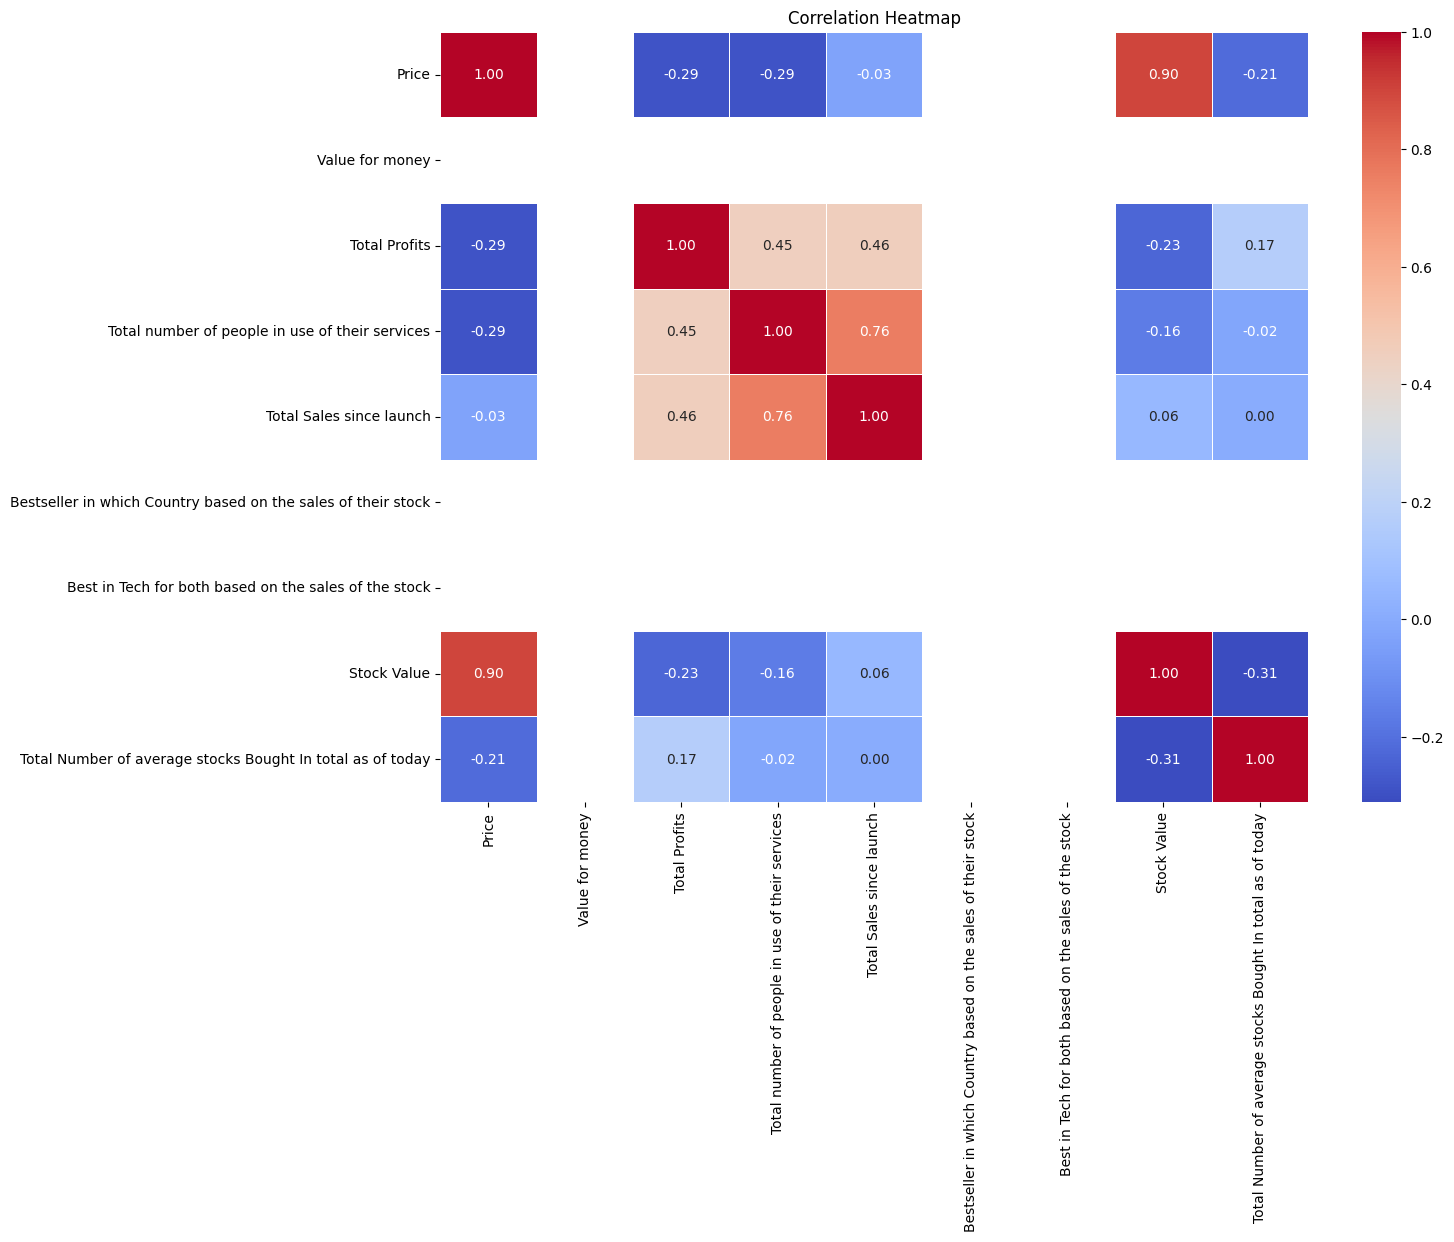

In [ ]:
# to calculate correlation matrix after conversion
correlation_matrix = df.corr()

# to plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

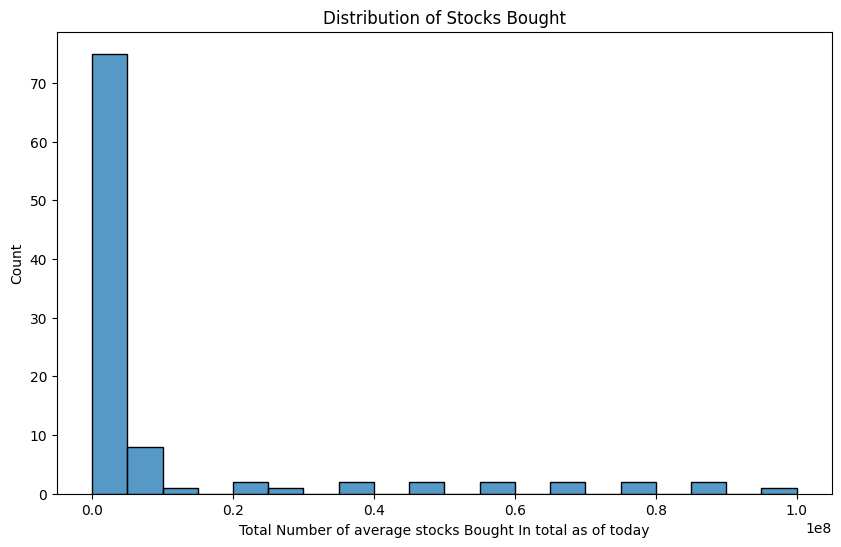

In [ ]:
#histogram - distribution of total no of Stocks Bought
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Number of average stocks Bought In total as of today'], bins=20)
plt.title('Distribution of Stocks Bought')
plt.show()

Mean Squared Error: 4888626.570
R^2 Score: 0.970


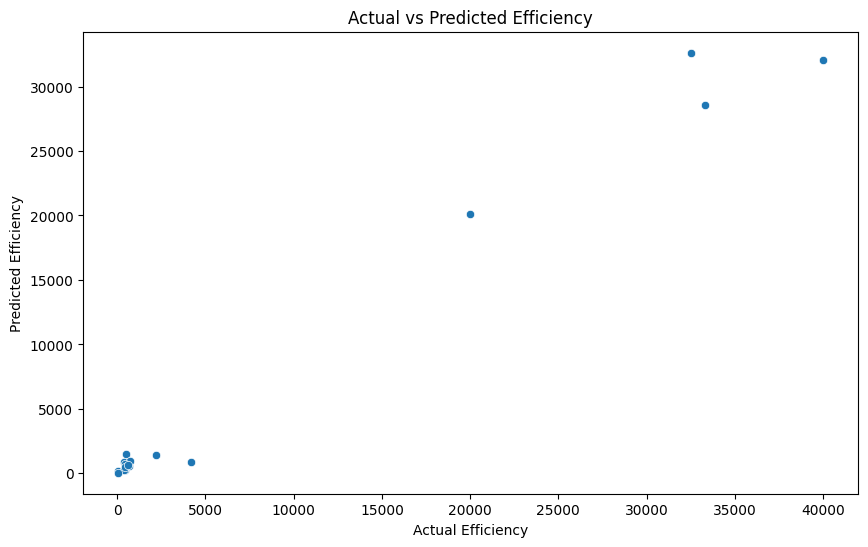

In [ ]:
#selecting features and target variable
features = ['Stock Value', 'Price', 'Total Sales since launch', 'Total Profits']
X = df[features]

#to check if 'Efficiency' is in the columns
if 'Efficiency' in df.columns:
    y = df['Efficiency']
else:
    #to calculate efficiency
    df['Efficiency'] = (df['Total Profits'] / df['Total Sales since launch']) * 100
    y = df['Efficiency']

#to split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#to scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#using random forest regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#to predict on the test data
y_pred = model.predict(X_test)

#to evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.3f}')
print(f'R^2 Score: {r2:.3f}')

#to plot the predicted vs actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Efficiency')
plt.ylabel('Predicted Efficiency')
plt.title('Actual vs Predicted Efficiency')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:', r2_score(y_test, y_pred))

Mean Absolute Error: 989.0826129031957
Mean Squared Error: 4888626.569773006
Root Mean Squared Error: 2211.023873632532
R-squared: 0.9697702109114483
